In [1]:
import os
from math import log

import pandas as pd

In [2]:
PATH = os.path.join("facebook", "reaction_counts.csv")

In [3]:
df = (
    pd.read_csv(PATH)
        .assign(status_published=lambda df_: pd.to_datetime(df_["status_published"]))
        .assign(status_len=lambda df_: df_["status_message"].str.len())
        .assign(status_log_len=lambda df_: df_["status_message"].apply(lambda s: log(len(str(s)))))
        .sort_values("status_published")
        .set_index("status_published")
)

df.head()

,status_id,status_message,link_name,status_type,status_link,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_len,status_log_len
status_published,,,,,,,,,,,,,,,,
2009-04-16 09:53:00,153080620724_162861335065,Watch Donald Trump on Good Morning America: ht...,NaN,status,NaN,209,205,9,209,0,0,0,0,0,94.0,4.543295
2009-04-16 10:05:34,153080620724_71666378535,Watch Donald J. Trump on Larry King Live: http...,NaN,status,NaN,136,66,0,136,0,0,0,0,0,115.0,4.744932
2009-04-16 17:44:23,153080620724_85435041544,Follow Donald J. Trump on Twitter: http://twit...,NaN,status,NaN,137,60,2,137,0,0,0,0,0,69.0,4.234107
2009-04-19 17:18:16,153080620724_96770601006,- Who do you think will be fired on Celebrity ...,NaN,status,NaN,140,111,6,140,0,0,0,0,0,65.0,4.174387
2009-04-20 08:44:07,153080620724_86348879816,- Check out the official website for Donald Tr...,NaN,status,NaN,152,43,3,152,0,0,0,0,0,123.0,4.812184


<AxesSubplot: xlabel='status_published'>

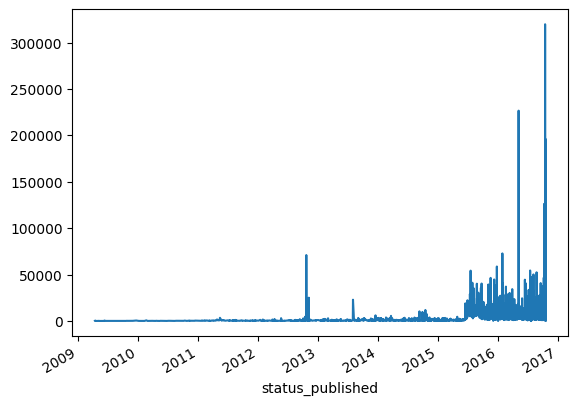

In [4]:
df["num_comments"].plot()

<AxesSubplot: xlabel='status_type'>

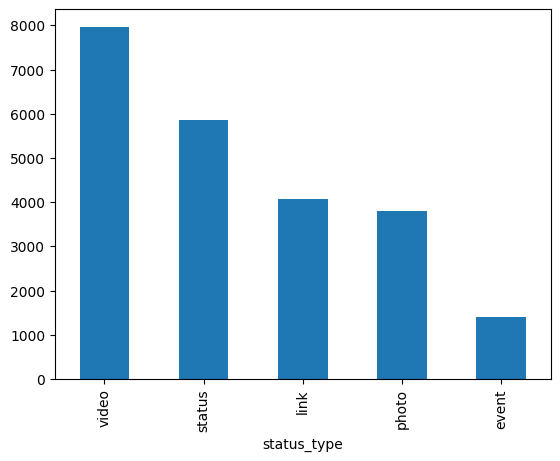

In [5]:
df.groupby("status_type")["num_comments"].mean().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot: xlabel='status_type'>

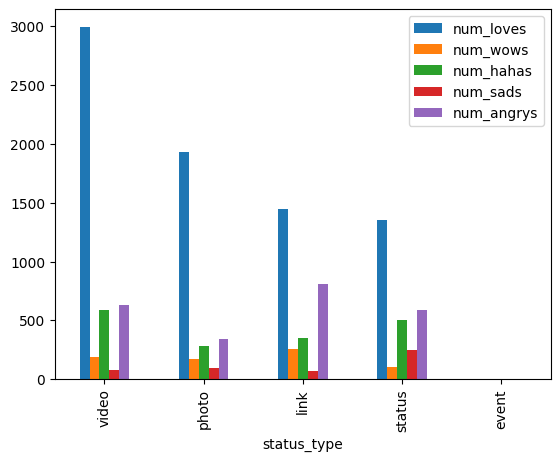

In [6]:
df.groupby("status_type")[["num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]].mean().sort_values("num_loves", ascending=False).plot(kind="bar")

<AxesSubplot: xlabel='status_published'>

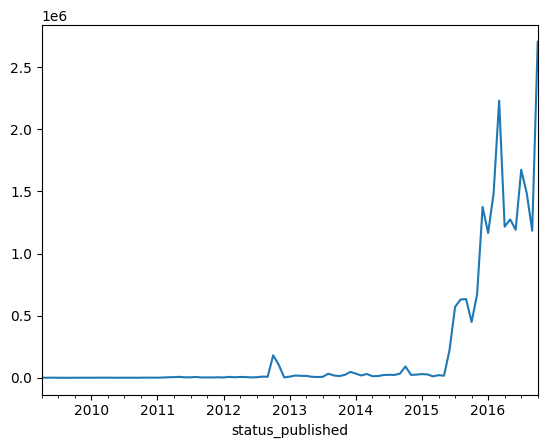

In [7]:
df.groupby(pd.Grouper(freq="1m"))["num_comments"].sum().plot()

<AxesSubplot: xlabel='status_len', ylabel='num_reactions'>

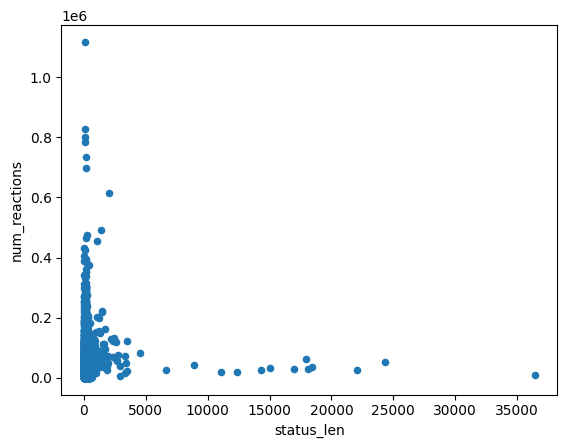

In [8]:
df[["status_len", "num_reactions"]].plot(x="status_len", y="num_reactions", kind="scatter")